# Example usage for WCA1

In [1]:
import Pkg
Pkg.activate("../../WCA1")

using WAV, DSP.Windows, Plots

using WCA1

┌ Info: Recompiling stale cache file /Users/darioprandi/.julia/compiled/v1.1/WCA1/AWGS5.ji for WCA1 [f15acf5a-a3df-11e9-3331-7bf93435fc23]
└ @ Base loading.jl:1184


We start by defining an artificial sound.

  0.002431 seconds (83 allocations: 2.433 MiB)


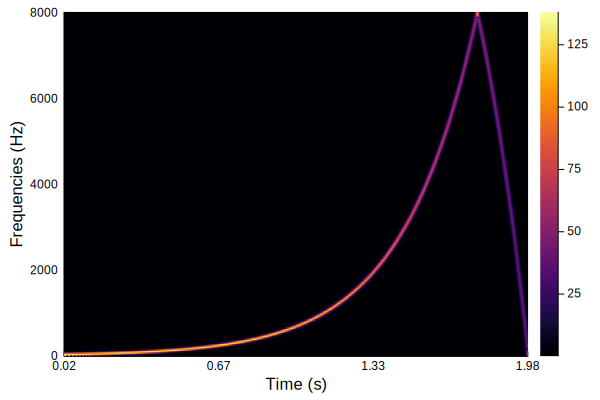

In [2]:
rate = 16000.
duration = 2
samples = round(Int,duration*rate)
x = [sin(exp((t+20000)/5000)) for t in 1:samples ]

stft(x, 500, 450, fs = rate, window = hanning)
@time m = stft(x, 500, 450, fs = rate, window = hanning)
show_stft(m) 

Then we lift it

In [3]:
lift(m)
@time Lm = lift(m);

  0.584361 seconds (2.46 M allocations: 356.067 MiB, 45.19% gc time)


Let us check that the projection is a left inverse of the lift.

1.5586326890272645e-19

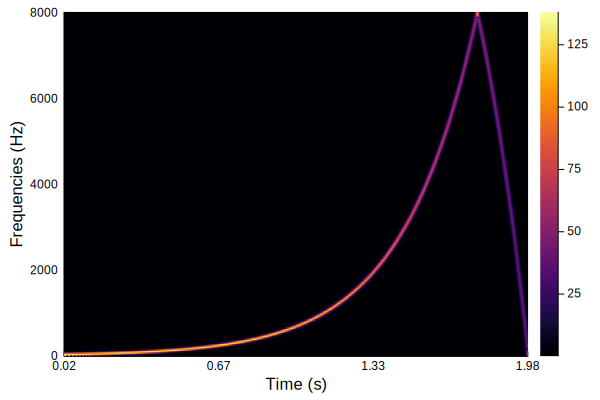

In [4]:
maximum(abs.(project(Lm)[:,:] - m[:,:])) |> display
show_stft(project(Lm))

Then, in order to apply the WC evolution, we prepare the Kolmogorov kernel.

  1.336841 seconds (44.99 M allocations: 1.111 GiB, 26.46% gc time)


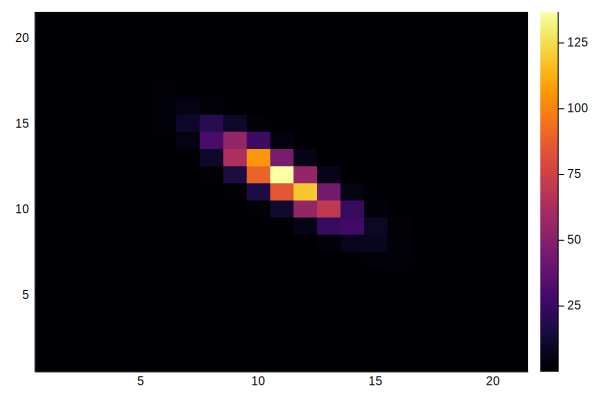

In [5]:
τ = 20 * step(time(Lm))
@time k = kernel_computation(normalize(freq(Lm)), slopes(Lm), τ, n = 10)
heatmap(k[100,50])

Finally, we can evolve the given sound.

 41.118498 seconds (13.35 k allocations: 2.705 GiB, 1.27% gc time)


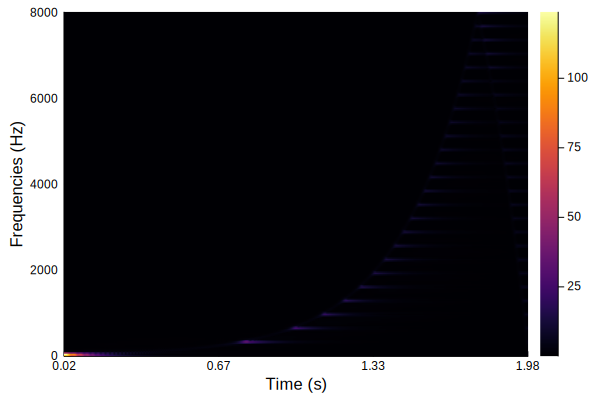

In [6]:
wc_delay(Lm, 0, 0, 0, K=k)
@time W = wc_delay(Lm, 10, 10, 10, K=k)
show_stft(project(W))

# Test on interrupted sound

  0.001431 seconds (83 allocations: 2.433 MiB)


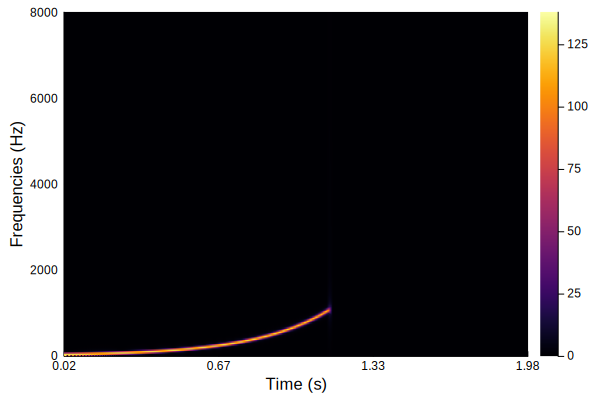

In [7]:
rate = 16000.
duration = 2
samples = round(Int,duration*rate)
y = [ t <= 8*samples/14 ? sin(exp((t+20000)/5000)) : 0. for t in 1:samples ]
wavwrite(y, "ugo-corr.wav", Fs = rate)

@time m2 = stft(y, 500, 450, fs = rate, window = hanning)
show_stft(m2) 

In [ ]:
@time Lm2 = lift(m2)
@time W = wc_delay(Lm2, 60, 100, 250, K=k)
show_stft(project(W))

In [ ]:
res = istft(project(W))
plot([y,res]) |> display
wavwrite(res, "ugo-corr-res.wav", Fs = rate)

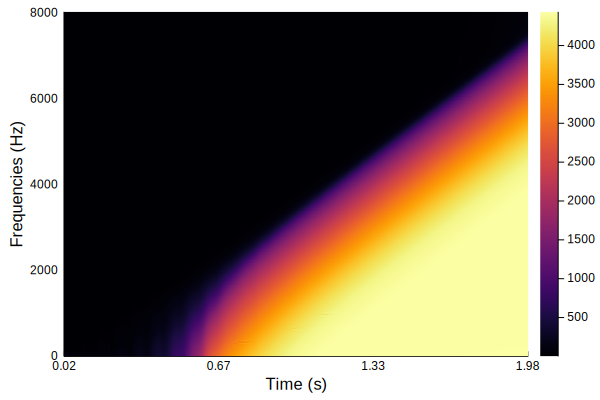

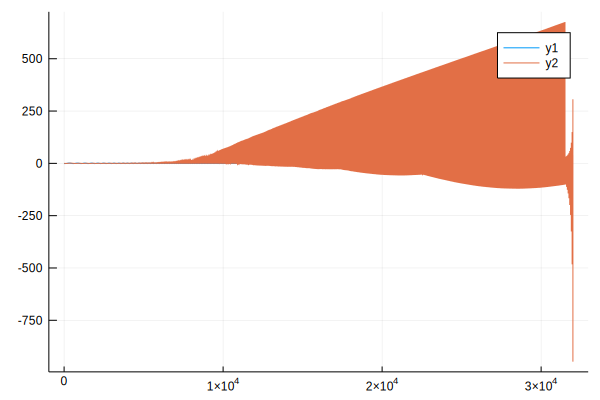

 43.029857 seconds (13.34 k allocations: 2.705 GiB, 1.31% gc time)


In [10]:
@time W = wc_delay(Lm2, 50, 100, 250, K=k)
show_stft(project(W)) |> display
res = istft(project(W))
plot([y,res]) |> display
wavwrite(res, "ugo-corr-res2.wav", Fs = rate)